# Pose Classification Using Keypoints and Image Classification
### By: Kyle Burke
### Date: 06/25/2023

----

## Introduction

With the decline of physical labor as the primary means of getting work done, people rely on the gym and outdoor spaces to keep their bodies fit. In this era of sedentary lifestyles and prolonged sitting, the importance of maintaining proper posture and engaging in regular physical activity has become increasingly vital. Poor posture not only affects one's overall well-being, it also contributes to various musculoskeletal issues and chronic pain. Recognizing the significance of addressing this concern, researchers and technologists have turned to cutting-edge technologies such as neural networks for pose estimation and activity classification.

These technologies off the opportunity to provide users with active feedback on various forms of exercises. Exercise, like food, it intended to be varied and diverse. The human body is designed to move in many different ways and the more variety the better. However, with the variety comes the challenge of maintaining proper form and technique. Recent advancements in computer vision and deep learning have paved the way for innovative solutions that can offer real-time feedback to users.

One prominent technology used in this domain is Detectron2, a powerful and flexible object detection framework built on the PyTorch library. By leveraging the capabilities of Detectron2, researchers and developers can obtain accurate and precise body keypoints from images or video frames. These keypoints represent the joints and key body landmarks, enabling the extraction of valuable information about the user's posture and body position.

The goal of this project is to create a model that can accurately classify yoga poses. There is a great deal of variety in form and styles of exercise. Activities specific to a sport, stretching, martial arts, and weight lifting represent a incomplete list of all human activites and still represent such a wide variety of types of movements. Due to the nature of yoga, it offers a well defined set of poses that are easily recognizable and can be used to train a model on the correct form and technique. In order to know if a pose is being performed correctly, the model must be able to recognize the pose and provide contextual keedback for the correct position.

## Data and It's Sources

To train the model, datasets on Kaggle were used. The datasets are as follows:
1. [Yoga Pose Image Classification Dataset](https://www.kaggle.com/shrutisaxena/yoga-pose-image-classification-dataset)
2. [Yoga Posture Dataset](https://www.kaggle.com/tr1gg3rtrash/yoga-posture-dataset)

Combined, the dataset consisted of 119 different poses with an average of about 56 images in each. The first dataset contained nearly 6,000 images of 107 poses while the second dataset contained nearly 3,000 images spread between 74 poses.

The images themselves appear to be scraped from the web, most noteably because the two datasets contained over 2,000 duplicate images. The images were of varying quality, resolution and sizes which meant that the images needed to be preprocessed before they could be used to train the model.

## Data Preprocessing

To ensure the dataset is standardized and suitable for pose estimation and activity classification tasks, several preprocessing steps were performed on the collected dataset. These steps are as follows:

Firstly, the datasets were downloaded to obtain the necessary image data for analysis. This step involved retrieving the image files from their respective sources, allowing for further processing and analysis to be conducted.

Next, the folder names containing poses were cleaned to ensure consistency and uniformity. This involved standardizing the spelling of pose names across the dataset. In the `Yoga Posture Dataset` for example, all poses were capitalized while in `Yoga Pose Image Classification Dataset` they were not. `urdhva-mukha-svanasana` was misspelled in `Yoga Posture Dataset` as `urdhva-mukha-svsnssana`. Additionally, `Yoga Posture Dataset` referred to `Virabhadrasana One` while `Yoga Pose Image Classification Dataset` referred to the pose as `Virabhadrasana i`. These inconsistencies were corrected to ensure uniformity and consistency across the dataset.

To consolidate and organize the dataset further, poses were combined into the same directory. This step involved gathering images belonging to the same pose and placing them within a single directory. To address potential duplicates or similar images with different names, image deduplication was performed. This step aimed to remove redundant copies of images with identical content but different filenames, thereby reducing data redundancy and streamlining the dataset.

To do this, a file hashing technique was utilized. Hashing is a technique that converts data into a string of characters unique to to data of that file. This string of characters is called a hash. The hash is generated using a hash function that is designed to map data of arbitrary size to fixed-size values. The hash function used in this project is called `SHA256`. This function takes in a string of data and outputs a 256-bit hash. The hash is unique to the data that is passed in. This means that if the same data is passed in, the same hash will be generated. However, if the data is different, the hash will be different. This property of hashing makes it ideal for deduplication. See the example below:

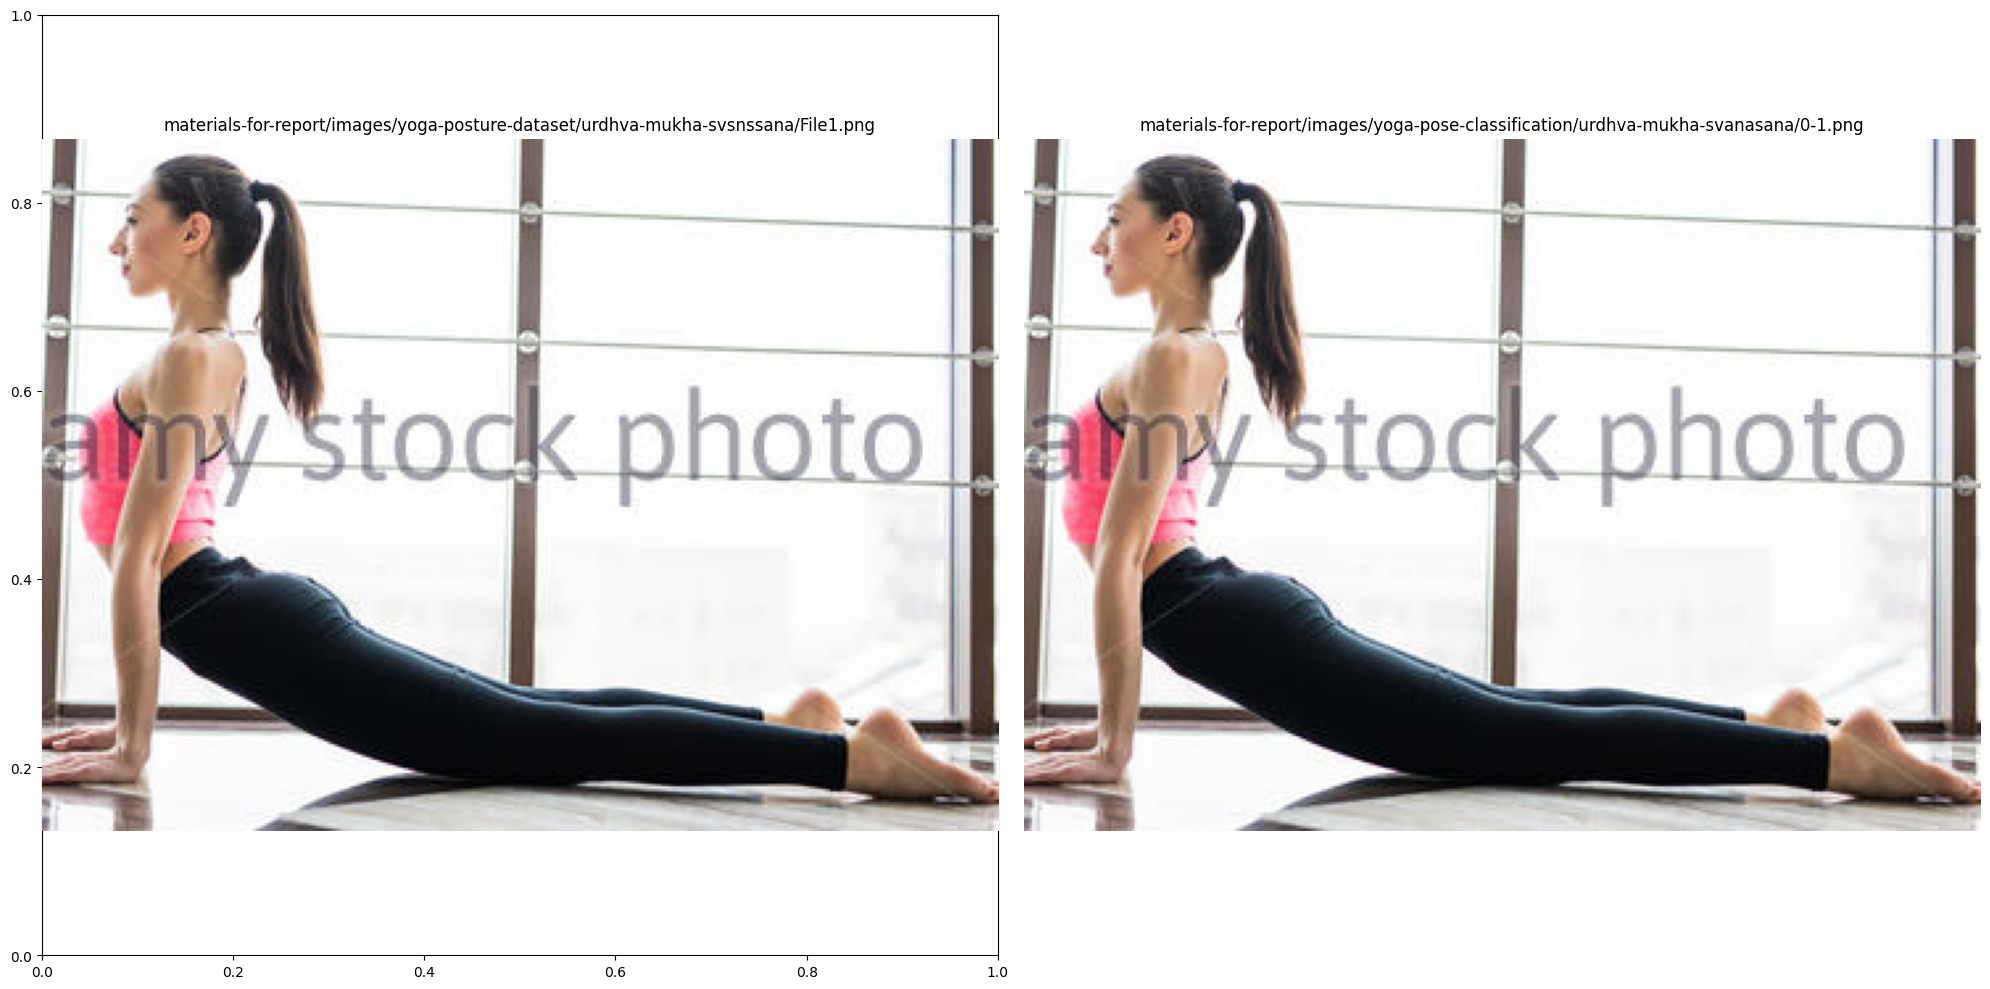

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

potential_same_posture_files = [
    'materials-for-report/images/yoga-posture-dataset/urdhva-mukha-svsnssana/File1.png',
    'materials-for-report/images/yoga-pose-classification/urdhva-mukha-svanasana/0-1.png'
]

fig = plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)

for index, file in enumerate(potential_same_posture_files):
    ax = fig.add_subplot(1, 2, index+1, xticks=[], yticks=[])
    ax.set_axis_off()
    img = mpimg.imread(file)
    imgplot = plt.imshow(img)
    ax.set_title(file)

plt.tight_layout()
plt.axis('off')
plt.show()


In [14]:
import hashlib
for file in potential_same_posture_files:
    with open(file, "rb") as f:
        bytes = f.read()
        readable_hash = hashlib.sha256(bytes).hexdigest()
        print(readable_hash)

183e7b3dc6a282ae48918c2cdb38551fb1a8b923c467fac8c43b06356bd5eeab
183e7b3dc6a282ae48918c2cdb38551fb1a8b923c467fac8c43b06356bd5eeab


After this process, it was discovered that several poses contained significantly less data than others. Classification is only as good as the data provided to it. If the model is trained on a small subset of the data, it will not be able to generalize well to the entire dataset. To address this issue, the dataset was balanced by removing poses with less than 50 images.

Following image preprocessing and filtering of the data, keypoints were extracted from the images using `Detectron2`. Keypoints represent specific joints or landmarks on the human body, which are crucial for pose estimation. There are state of the art models ([seen here](https://github.com/facebookresearch/detectron2/blob/main/MODEL_ZOO.md#coco-person-keypoint-detection-baselines-with-keypoint-r-cnn)) that have been trained on the COCO dataset, a large scale dataset containing 328,000 images. The most accurate model `X101-FPN` a recurrent neural network was used to generate keypoints despite the fact it takes longer to find the keypoints.

These models are able to detect 17 keypoints on the human body. The keypoints are as follows:

```py
(
    'nose',
    'left_eye',
    'right_eye',
    'left_ear',
    'right_ear',
    'left_shoulder',
    'right_shoulder',
    'left_elbow',
    'right_elbow',
    'left_wrist',
    'right_wrist',
    'left_hip',
    'right_hip',
    'left_knee',
    'right_knee',
    'left_ankle',
    'right_ankle'
)
```

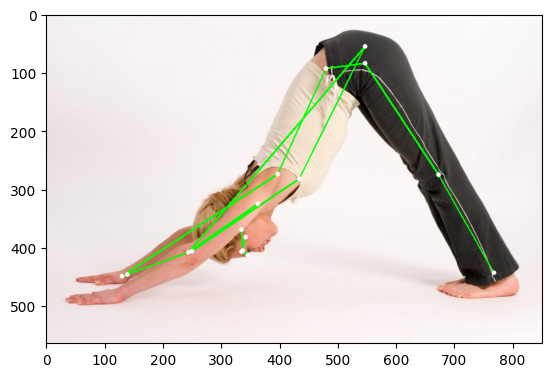

In [1]:
from IPython.display import Image
Image(filename='./images/good-keypoints.png')

In [ ]:
{
    'nose': tensor([280.0167, 278.4667]),
    'left_eye': tensor([260.7471, 297.7350]),
    'right_eye': tensor([262.3095, 292.0066]),
    'left_ear': tensor([251.8936, 291.4858]),
    'right_ear': tensor([263.8719, 268.5723]),
    'left_shoulder': tensor([269.0799, 231.5982]),
    'right_shoulder': tensor([332.0964, 222.2245]),
    'left_elbow': tensor([214.3962, 296.1727]),
    'right_elbow': tensor([214.3962, 296.6935]),
    'left_wrist': tensor([154.5045, 343.0412]),
    'right_wrist': tensor([155.0253, 343.0412]),
    'left_hip': tensor([381.5721, 100.3662]),
    'right_hip': tensor([380.5305,  99.8454]),
    'left_knee': tensor([382.0929,  86.8264]),
    'right_knee': tensor([461.7749, 214.9338]),
    'left_ankle': tensor([534.1658, 324.8146]),
    'right_ankle': tensor([530.5202, 319.6070])
}


## Todo: get example of an image with keypoints on it
An example of keypoints inferenced from an image

During the process of keypoint generation, there were several images where the model was unable to detect a human in the image and therefore did not produce any keypoints. This was due to the fact that the model was not able to detect a person in the image. While a possible solution could have been to lower the threshold, if a state of the art model was not able to find a human in these images, the classification model will also have a difficult time making sense of the image as well. These images were removed from the dataset. Here is an example:

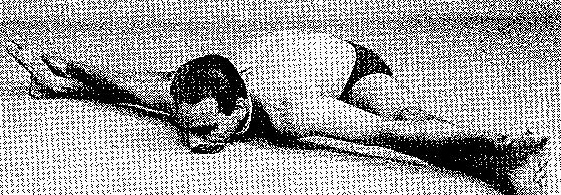

In [16]:
from IPython.display import Image
Image(filename='./images/no-human-found.png')

The keypoints obtained from the images were then scaled from their original (x, y) positions within the image to relative positions within the bounding box of the detected person. This scaling facilitates standardized representation of the keypoints, allowing for meaningful and consistent analysis across different images and individuals.

## TODO: get example of an image with keypoints on it

Finally, a data structure connecting each image to its corresponding keypoint data was created. This data structure enables efficient mapping and retrieval of keypoint information associated with each image, facilitating seamless integration into the subsequent classification model and analysis pipeline.

By performing these preprocessing steps, the dataset is refined, standardized, and made compatible with pose estimation and activity classification tasks. This ensures the reliability and accuracy of subsequent analysis and feedback generation for users based on their posture and exercise performance.

The models were trained on 80% of the data and tested on the remaining 20%.

## Modeling

### Basic Models
In order to build a baseline to compare the performance of a more complex model, simple models were utilized with the scaled keypoint dataset. The results of the simple models on the validation set are as follows:
- `LogisticRegression` model produced a nearly `40%` accuracy
- `K-Nearest Neighbor` model produced a mid-`30%` accuracy
- `Support Vector Machine` model produced a `40%` accuracy
- `DecisionTreeClassifier` model produced a `30%` accuracy
- `RandomForestClassifier` model produced a `50%` accuracy
- `XGBoostClassifier` model produced a `50%` accuracy

After hyper-perameter tuning, the `RandomForestClassifier` was able to achieve a `56%` accuracy on the test set. Given that there were 82 classes in total, and less than 100 instances for nearly every class, the accuracy of this model is quite good. It was able to generalize well and was able to predict the correct class for the majority of the time.

Random forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set. They can be quite helpful for inference tasks because they are fast.

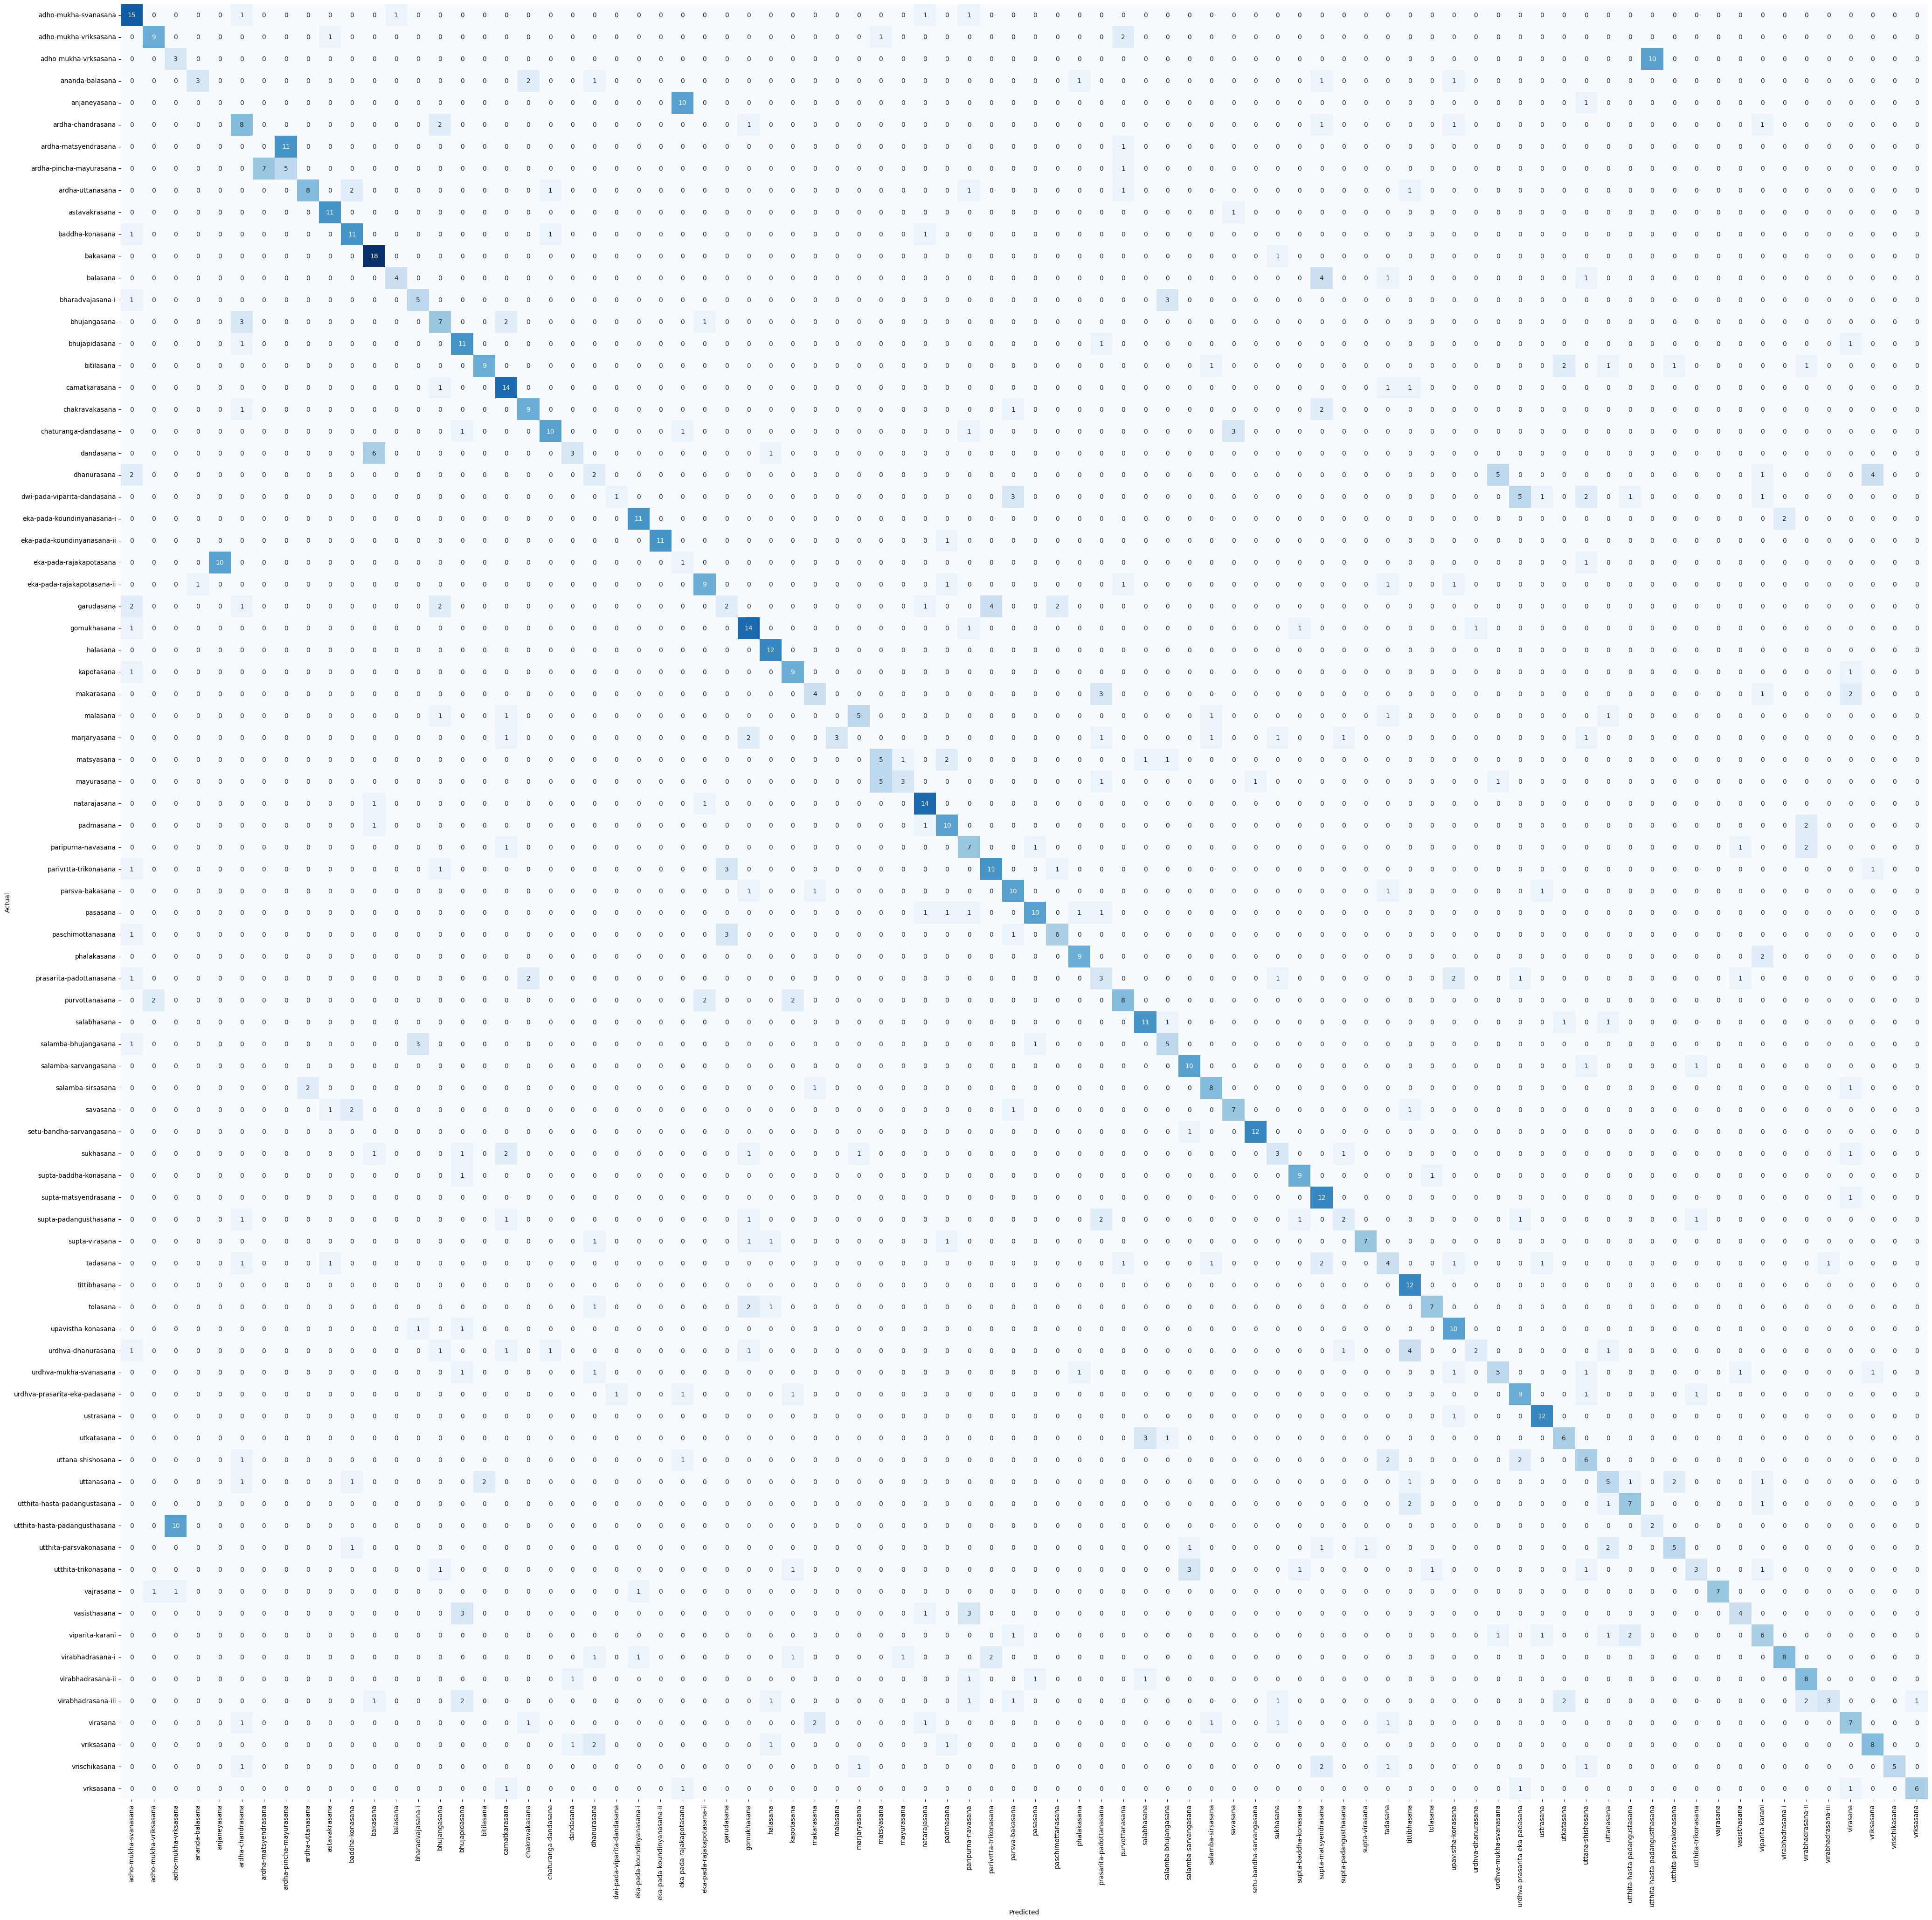

In [3]:
from IPython.display import Image
Image(filename='./images/rf-confusion-matrix.png')

### Conclusion

In conclusion, the integration of neural networks, pose estimation, and activity classification offers a promising approach to revolutionize the way individuals engage in physical exercise. By leveraging technologies like Detectron2, users can receive active feedback on their posture, enabling them to make corrective adjustments and optimize their exercise routines. This innovative application has the potential to bridge the gap between expert guidance and independent exercise, promoting proper posture and reducing the likelihood of musculoskeletal issues. As the demand for accessible and personalized fitness solutions continues to rise, the use of neural networks for pose estimation and activity classification stands as a transformative tool in promoting healthy and effective exercise habits in our increasingly sedentary world.